# Exploração: Regressão Linear e Classificação

Um requisito fundamental para se dominar os conceitos de ciência de dados é aplicá-los e praticá-los. Este notebook exploratório foi projetado para fornecer a você um espaço semidirigido exatamente para isso com Python, regressão linear e habilidade de classificação baseadas em ML que você abordou em um workshop presencial ou por meio do Microsoft Learn. Os exemplos específicos neste notebook aplicam os conceitos de NumPy e pandas em um contexto de ciências biológicas, mas são aplicáveis ​​em todas as disciplinas e setores da indústria.

Este notebook está dividido em diferentes estágios de exploração. As sugestões iniciais para exploração são mais estruturadas do que as posteriores e podem fornecer alguns conceitos e habilidades adicionais para enfrentar os desafios da ciência de dados com dados do mundo real. No entanto, este notebook foi projetado para fornecer a você uma plataforma de lançamento para sua experimentação pessoal com ciência de dados, então fique à vontade para adicionar células e executar seus próprios experimentos além dos sugeridos aqui. Esse é o poder e o propósito de uma plataforma como o Jupyter Notebook!

## Configuração e atualização em notebooks

Antes de começar, você precisará conhecer as principais bibliotecas usadas para explorar e manipular dados em Python: NumPy, pandas e scikit-learn. A célula abaixo também importa Matplotlib, a principal biblioteca de visualização em Python. Por simplicidade e consistência com as instruções anteriores, aliases padrão da indústria são aplicados a essas bibliotecas importadas. A célula abaixo também executa o comando mágico `%matplotlib inline`, que instrui o Jupyter a exibir a saída do Matplotlib diretamente no notebook. Essa célula também importa muitas das funções específicas de scikit-learn que você precisará, mas sinta-se à vontade para importar outras conforme achar adequado no curso de sua exploração.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

Como já deve ter passado algum tempo desde a última vez que você trabalhou com os Jupyter notebooks, aqui está uma rápida atualização sobre como usá-los de forma eficiente.

### Células do Notebook

As células do notebook são divididas em células de texto Markdown e células de código interativas. Você pode reconhecer facilmente as células de código pelo `[-]:` à esquerda delas.

O código em uma célula de código só foi executado - e, portanto, está disponível para uso em outras células de código no notebook - se houver um número ao lado da célula de código (por exemplo, `[1]:`).

Para executar o código em uma célula, você pode clicar no ícone ** Executar ** no canto superior esquerdo de uma célula de código ou pressionar ** `Ctrl` + `Enter` **.

### Documentação e ajuda

A documentação para objetos e funções Python está disponível diretamente nos blocos de notas do Jupyter. Para acessar a documentação, basta colocar um ponto de interrogação na frente do objeto ou função em uma célula de código e executar a célula (por exemplo, `?print`). Uma janela contendo a documentação será aberta na parte inferior do notebook.

Vamos à exploração!

## Seção 1: Exploração guiada

Para a primeira parte deste workshop, você assumirá o papel de um cientista de dados examinando algumas estatísticas biológicas brutas. O conjunto de dados fornecido está no arquivo `mammals.csv`, que documenta o peso corporal (em kg) e o peso do cérebro (em gramas) de 62 mamíferos. (Fonte: Rogel-Salazar, Jesus (2015): Mammals Dataset. Figshare. Dataset. Https://doi.org/10.6084/m9.figshare.1565651.v1. Extraído de Allison, T. e Cicchetti, DV (1976). Sleep in mammals: ecological and constitutional correlates. *Science, 194*, 732-734.)

Especificamente, sua tarefa é avaliar a relação entre o peso corporal dos mamíferos e o peso do cérebro. Mesmo sem experiência no domínio, parece lógico que alguma relação deva existir (afinal, parece seguro supor que animais maiores teriam cérebros proporcionalmente maiores). Mas qual é a relação exata? Quão forte é esse relacionamento? Determinar esses detalhes é útil em campos como a biologia evolutiva e isso será o seu trabalho hoje.

### Importar e investigar os dados

Use `pd.read_csv()` para importar `mammals.csv` e execute qualquer outra investigação inicial que achar necessária para se familiarizar com o conjunto de dados. (Para uma atualização sobre como importar dados para o pandas, consulte os módulos Reactors em Manipulação e limpeza de dados ou pandas ou consulte a [documentação do pandas] (https://pandas.pydata.org/pandas-docs/stable/reference/api/ pandas.read_csv.html).)

In [4]:
# Import the data from mammals.csv into a DataFrame.


,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


### Plote os dados

Freqüentemente, a melhor maneira de ter uma ideia dos seus dados é fazer isso visualmente. Como você tem features numéricas, um gráfico de dispersão seria o mais apropriado para este conjunto de dados. pandas DataFrames têm dois métodos, [plot] (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) e [plot.scatter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html), que podem ser usados para criar gráficos de dispersão.

<AxesSubplot:xlabel='body', ylabel='brain'>

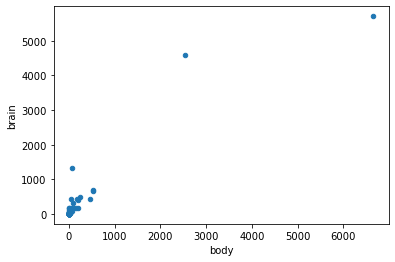

In [5]:
# Create a scatterplot of mammalian body and brain masses.


Não se preocupe: seu gráfico de dispersão deve ser difícil de ler. A maioria dos valores estão agrupados na extremidade de valores pequenos com dois mamíferos muito grandes em particular (os elefantes asiáticos e africanos) distorcendo a escala.

### Transforme seus dados

Por causa da dispersão decididamente não linear do tamanho dos mamíferos, você precisará transformar seus dados para ver mais claramente as relações neles.

**Discussão em grupo ou com parceiro **

  - Qual feature no conjunto de dados você deve transformar? Você deve transformar ambos? Por quê? O que você imagina que acontecerá após a transformação?
  - Que transformação você acha que deveria usar? Que palavras-chave você vê na documentação do método plot do pandas que podem dar uma dica?

<AxesSubplot:xlabel='body', ylabel='brain'>

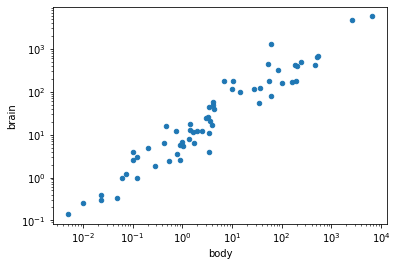

In [8]:
# Create a scatterplot of mammalian body and brain masses with base-10 logarithmic transformations applied to both axes.


### Ajuste e plote uma regressão linear em seus dados

Transformados, os dados apresentam uma relação linear elegante; apenas olhando para o gráfico de dispersão, a linha praticamente se desenha. Mas quão linear é esse relacionamento? Dito de outra forma, a que distância da reta de melhor ajuste estão os pontos de seu conjunto de dados, em média? Ajuste e plote um modelo de regressão linear simples para os dados descobrirem. Se você não tiver certeza sobre como fazer isso, consulte o módulo Reactors em Modelos de aprendizado de máquina para se lembrar. Você precisará realizar as seguintes etapas para ajustar o modelo:

1. Divida seu conjunto de dados em uma variável preditora (`X` é um nome comum desta variável) e a variável de resposta (`y` é um nome de variável comum para isso). (Lembre-se de transformar seus dados neste estágio da mesma maneira que você os transformou quando os plotou.)
2. Divida ainda mais seu em subconjuntos de treinamento e teste. (Existe uma função scikit-learn para isso.)
3. Crie o objeto de modelo de regressão linear.
4. Ajuste o modelo aos dados de treinamento.

**Nota: ** Você obterá um erro ao tentar ajustar os dados. Consulte https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html e https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html para documentação sobre como dar um reshape seus dados.

In [12]:
# You will need to reshape and transform your predictor (body) in order to fit your model.

# Use brain as your response.

# Split the predictor and response into training (70%) and test (30%) subsets.

# Create a linear-regression object.

# Fit the linear-regression model on the training data.


LinearRegression()

Agora plote seu modelo com seus dados. Execute [`matplotlib.pyplot.plot`] (https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) junto com seu gráfico de dispersão transformado dos dados para fazer isso. (Usar uma cor diferente para o modelo ajudará você a ver mais claramente.)

** Discussão em grupo ou parceiro **

  - O gráfico do seu modelo saiu como você esperava? Seu modelo linear aparece como uma linha? Lembre-se de que estamos modelando dados transformados em log; quais transformações complementares você precisa executar nele para produzir o gráfico linear que você espera?

**Observação:** Python tem funções que podem realizar as transformações necessárias e o conjunto de dados é pequeno o suficiente para que você provavelmente não perceba um atraso no desempenho usando as funções nativas do Python. Dito isso, é um bom hábito desenvolver o uso dos ufuncs NumPy para quando você lida com conjuntos de dados maiores. Para relembrar, consulte os módulos Reactors sobre NumPy.

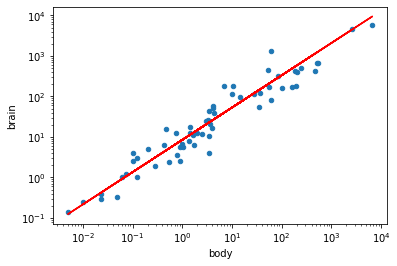

In [14]:
# Plot the body and brain masses with base-10 logarithmic transformations applied to both axes.

# Remember to account for the transformation of your data when you plot your model.


Se suas transformações foram bem-sucedidas, você deve ver uma bela linha reta com seus pontos de dados agrupados próximos a ela. Mas aparência pode ser subjetiva. Quão boa é a relação na realidade? Use o [coeficiente $R^2$] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) para descobrir.

In [16]:
# Print out the R-squared value for you model.


0.9329779121336187

## Seção 2: Exploração intermediária

Como sua investigação mostrou, há uma fore correlação entre o tamanho dos mamíferos e o tamanho de seus cérebros: sua pontuação de $R^2$ indica que quase 88% do log do peso médio proporcional do cérebro de um mamífero pode ser explicado usando apenas o log do peso do corpo. (A tarefa dos biólogos evolucionistas é examinar o que explica os outros 12% da variância.) É um bom modelo, com certeza, mas na prática, quão bom é "bom"? Plote o modelo linear em relação aos dados não transformados para ver isso mais claramente.

Para criar este gráfico, você usará novamente o método pandas `plot` (ou `plot.scatter`) em conjunto com `matplotlib.pyplot.plot`. No entanto, você precisará criar a matriz Numpy para fornecer entradas ao longo do eixo x para `matplotlib.pyplot.plot`. (Consulte o módulo Reactors sobre Numpy para relembrar como fazer isso.) Você também precisará transformar essa matriz ao inseri-la em seu modelo e transformar também a saída de seu modelo para representá-la com precisão.

**Discussão em grupo ou parceiro **

 - Que erros você está recebendo? Você precisa dar reshape em algum dos dados? Os valores zero estão causando problemas para alguma de suas transformações? Qual a melhor forma de lidar com isso?

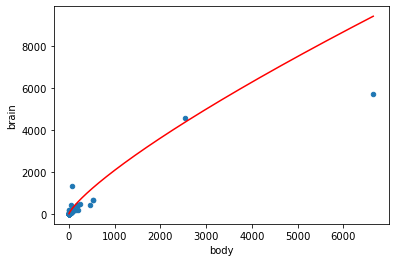

In [20]:
# Plot the body and brain masses without the log transformations.

# Create an array of x-axis values to use in plotting the model.


# Remember in plotting this that your model was fitted using transformed data.


Mesmo com um bom modelo, o ruído inerente aos dados reais pode indicar que os valores experimentais ainda divergem dos seus previstos em mais de 20% em alguns casos. Por esse motivo, pode ser valioso lembrar a máxima do estatístico George Box de que "[todos os modelos estão errados, mas alguns são úteis] (https://en.wikipedia.org/wiki/All_models_are_wrong)."

**Nota: ** Outra maneira de abordar este desafio é lidar com o coeficiente e intercepto do modelodiretamente. Lembre-se de que os modelos lineares assumem a forma de `Y` $=$ `intercepto` $+$ `coeficiente` $*$ `x`. Verifique a documentação de seu objeto de modelo para ver como acessar esses valores em seu modelo.

In [21]:
# Print out the coefficient and intercept for the model.


Interepto: 2.136742919604141
Coeficiente: [0.79704025]


### Quando a regressão linear é menos interessante

À medida que você desenvolve suas habilidades de ciência de dados, é natural querer aplicar as novas ferramentas que você aprendeu a usar em uma variedade de problemas. Portanto, ao aprender sobre novos algoritmos, às vezes pode ser tão valioso saber quando não aplicá-los quanto quando usá-los.

Por exemplo, considere um caso em que a regressão linear pode não fornecer o insight que você gostaria. Para investigar isso, importe e plote o conjunto de dados `lynx.csv`, que contém números anuais de armadilhas de lince para 1821-1934 na área do rio Mackenzie no Canadá. (Fonte: Campbell, MJ e Walker, AM (1977). A Survey of statistical work on the Mackenzie River series of annual Canadian lynx trappings for the years 1821–1934 and a new analysis. *Journal of the Royal Statistical Society series A, 140*, 411-431. Doi: [10.2307 / 2345277] (http://doi.org/10.2307/2345277).)

<AxesSubplot:xlabel='Year'>

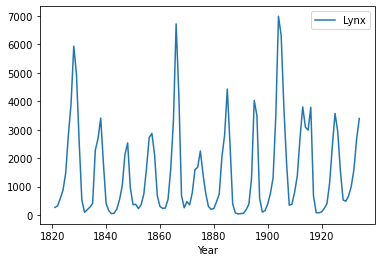

In [24]:
# Import the data from lynx.csv and plot it.
# Note: The plot of this data should produce a cyclical pattern.


Seu gráfico deve mostrar um padrão cíclico interessante para os dados. Um pico alto no número de linces é seguido por três picos menores a cada 9-10 anos e então o padrão se repete. O amplo suprimento de alimentos permite que o lince do rio Mackenzie se reproduza em grandes números, após o que a população cai por falta de comida. O suprimento de alimentos aumenta gradativamente, permitindo uma repetição do boom e declínio populacional do lince.

**Discussão em grupo ou parceiro **

  - Um modelo linear é apropriado para dados como este? Por que ou por que não? O que você acha que veria se tentar ajustar um modelo linear a esses dados?

Vá em frente e ajuste e plote esses dados como você fez para o conjunto de dados de mamíferos acima.

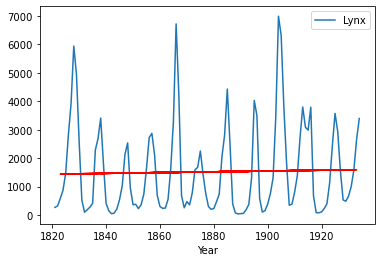

In [26]:
# Plot the lynx data and the fitted linear model.
# Remember to reshape your data in order to fit the regression model.


Agora confira o coeficiente $R^2$ para este modelo.

In [27]:
# Print out the R-squared score for this model.


0.007459792002947885

** Discussão em grupo ou parceiro **

  - O que significa esse coeficiente $R^2$? Que interpretação pode ter? (Esta [página] (https://web.maths.unsw.edu.au/~adelle/Garvan/Assays/GoodnessOfFit.html) da University of New South Wales pode ajudar na sua discussão.)
  - Mesmo que a sua pontuação de $R^2 $ não possa explicar a proporção da variância explicada pelo seu modelo, que informações ele pode fornecer?

### Classificação

Alguns profissionais dizem que 70% dos problemas em ciência de dados envolvem classificação. Esse número é provavelmente ainda maior nas ciências biológicas. Para explorar a classificação baseada em ML, vamos retornar a um conjunto de dados que você já encontrou no módulo Reactors Manipulating and Cleaning Data. Importe a biblioteca Python scikit-learn e use um conjunto de dados icônico que todo cientista de dados já viu centenas de vezes: o conjunto de dados *Iris* do biólogo e estatístico britânico Ronald Fisher usado em seu artigo de 1936 "The use of multiple measurements in taxonomic problems".

In [29]:
# Load the Fisher iris data.


No módulo Reactors Machine Learning, você usa os algoritmos de regressão logística e árvore de decisão para classificar as observações em duas categorias, mas há muitos outros tipos de algoritmos de classificação que você explorará neste módulo.

#### $K$-means Clustering

$K$-means clustering é um exemplo de aprendizado de máquina não supervisionado. Em vez de treinar um modelo, o algoritmo $k$-means examina todos os dados para determinar a qual categoria atribuir uma observação específica. Tudo o que você precisa fazer é fornecer ao algoritmo o número de categorias nas quais deseja que as observações sejam classificadas.

Com base no número de espécies no conjunto de dados `iris`, qual é o número mais adequado de clusters para enviar ao algoritmo? Ajuste um modelo $k$-means para esse número de clusters e meça sua precisão. (Consulte a documentação ?metrics.accuracy_score para obter informações sobre como fazer isso.)

In [ ]:
# Create a k-means clustering object with 3 clusters.

# Fit the k-means model.

# Find predicted values for all values of X.

# Print out the accuracy score for the fitted model.


** Discussão em grupo ou parceiro **

  - Essa acurácia é surpreendente? O que pode explicar valores tão baixos? Pense em como a acurácia funciona. Dica: imprima o y e as previsões.
  - E quanto à semente aleatória? Será que ela faz diferença?

#### $K$-nearest Neighbors

Um algoritmo de classificação que pode funcionar melhor no conjunto de dados `iris` é o algoritmo $k$-nearest neighbors (abreviado para $k$-NN). Ele funciona comparando uma observação com suas $k$ observações de treinamento mais próximas no espaço de features (onde $k$ é um parâmetro fornecido pelo usuário). $k$-NN é um algoritmo supervisionado, portanto, ele precisa ser fornecido com uma *resposta* - as classificações corretas que você está procurando (freqüentemente chamadas de $y$) - para classificar novas observações. Ajuste um modelo $k$-NN e use `metrics.accuracy_score` para examinar sua acurácia.

In [37]:
# Split the data into training and test subsets.

# Create a 5-nearest neighbors object.

# Fit the model.

# Find predicted values for the test cases.

# Print out the accuracy score for the fitted model.


Accuracy: 0.9555555555555556


** Discussão em grupo ou parceiro **

  - Tente fornecer diferentes parâmetros `random_state` para a função `train_test_split` (como `random_state = 0` e `random_state = 2`). O que causa as diferenças de acurácia?

Uma maneira de atenuar a aleatoriedade das amostras inerente à divisão de treinamento/teste é fazê-la repetidamente. Testar seus modelos desta forma é chamado de validação cruzada (ou $k$-validação cruzada após o número de vezes que você divide os dados novamente, os `folds`). O Scikit-learn tem uma [boa página] (https://scikit-learn.org/stable/modules/cross_validation.html) em sua documentação sobre o conceito.

Use o modelo `cross_val_score` para realizar uma validação cruzada de 10 vezes em seu modelo $k$-NN e obter a média das pontuações de precisão.

In [40]:
# Run 10-fold cross-validation on the 5-nearest neighbor model you have already fitted.

# Print out the mean score for the cross-validation.


Acurácia média: 0.9666666666666668


## Section 3: Individual Exploration

Here are some ideas to continue your exploration of classification and predictive ML algorithms:

- What number of nearest neighbors provides the highest average accuracy for your $k$-NN model? While it's true that with the $k$-NN algorithm you don't have to worry about feature engineering or selection, the selection of $k$ can play a big role in the algorithm's accuracy for you dataset and must be tuned. The better that you can tune your algorithm for accuracy, the better you can help domain experts solve problems, be they correctly identifying irises (in this example) or sequencing genes in bioinformatics or correctly identifying diseased cells in a medical application.

(Hint: Try referring back to the Reactors Python module for a refresher on loops and data structures to see how you could automate this comparison over many several different values of $k$.)

In [ ]:
# Create a list of values of k from 1 to 25.

# Create a dictionary of k values and associated mean cross-validation accuracy for each value of k.

# Find and print out the value of k that produced the highest accuracy and what that score is.


 - Visualize the `iris` dataset to see why the $k$-means algorithm produced the accuracy that it did.
 
 The `iris` dataset has four features, which means that a true scatter plot of all of the observations in it would require four dimensions, which is impossible to visualize directly. However, you can use a technique called principle component analysis (PCA) to reduce this to three dimensions with minimal loss of information. (Don't worry about the details of how PCA works; you will cover it in another session in the Reactors PCA module.)
 
 To visualized a "flattened" `iris` dataset, you will need to fit a PCA transformation with the data from the dataset. You can get some ideas about what code to use from this [page](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from the scikit-learn documentation.

In [ ]:
# Perform the PCA dimension-reduction on the iris data.

# Create the 3D plot of the "flattened" iris data set.


With this visualization in hand, why might $k$-means clustering not be a good classification algorithm to use with the `iris` dataset? (This [Wikipedia article](https://en.wikipedia.org/wiki/K-means_clustering) on $k$-means clustering might help your discussion.)